1\. Write a function that converts number representation, bin<->dec<->hex. (Clearly using the corresponding python built-in functions is not fair..)

In [37]:
#da binario a decimale (numero must be a list)
numero=[1, 0, 0, 0, 0, 0, 0, 1]#numero is binary and it is a list
def bin_to_dec(n):
    n.reverse()  #reverse numero because in a list element=0 is on the left; instead to convert the powers of 2 start from the right
    n_dec=0
    for i in range (len(n)):
        n_dec+=pow(2,i)*int(n[i])  #iterate 
    return n_dec
    
print(bin_to_dec(numero))

129


In [2]:
#da decimale a binario 
def dec_to_bin(num):
    n=int(num)
    resto=0
    quoziente=1
    num_bin=[] #creo un lista vuota da riempire con i resti
    while quoziente>0:
        quoziente=int(n/2)
        resto=int(n%2)
        num_bin.append(resto)
        n=n/2
    num_bin.reverse()
    print('' ''.join(map(str, num_bin)))
    return  

dec_to_bin(10)

1010


In [3]:
#da decimale a esadecimale
def dec_to_hex(num):
    n=int(num)
    resto=0
    quoziente=1
    num_hex=[] #creo un lista vuota da riempire con i resti
    num_hex_reversed=[] #creo un lista vuota da riempire con i resti ma in ordine inverso
    if n<16: print(n)
    else:        
        while quoziente>0:
            quoziente=int(n/16)
            resto=int(n%16)
            if resto>9:
                a = {10 : "A", 11 : "B", 12 : "C", 13 : "D",14 : "E", 15 : "F"} 
                num_hex.append(a[resto])
            else : 
                num_hex.append(resto)
            n=n/16
    num_hex_reversed = list(reversed(num_hex))
    print('' ''.join(map(str, num_hex_reversed)))
    return  
dec_to_hex(227)

E3


In [4]:
#da esadecimale a decimale
def hex_to_dec(num):
    n=str(num)
    n_dec=0
    for i in range (len(n)):
        if n[i].isdigit():
            n_dec+=pow(16,len(n)-i-1)*int(n[i])
        else:
            a = {"A" : 10, "B" : 11, "C"  : 12 ,"D"  : 13, "E"  : 14, "F"  : 15} 
            n_dec+=pow(16,len(n)-i-1)*int(a[n[i]])
    return n_dec

numero=input("inserisci un esadecimale: ")
print(hex_to_dec(numero))

inserisci un esadecimale: E2
226


2. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [46]:
import numpy as np
import numpy.ma as ma

#metto il mio numero in un array e poi lo maschero
#x=input("inserire un numero di 32 bit in binario: ")
#num=np.array([int(x[i]) for i in range(0,32)])

num=[1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
print(num)

#creo le maschere per segno, exp, mantissa
sign = ma.masked_array(num, mask=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
exp = ma.masked_array(num, mask=[1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
mantissa = ma.masked_array(num, mask=[1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

#get only the non-masked values.
#One can also use --> segno_arr = segno_arr[segno_arr.mask == False]
sign=sign_masked.compressed()
exp=exp_masked.compressed()
mantissa=matissa_masked.compressed()

#now convert rhe sign
if sign[0]==0:
    segno='+'
if sign[0]==1:
    segno='-'

#now convert exp in decimal form
def convert_exp(n):
    n_dec=0
    for i in range (len(n)):
        n_dec+=pow(2,len(n)-i-1)*int(n[i])  #iterate 
    return n_dec-127
esponente=convert_exp(exp)

#now convert mantix in decimal form
def convert_mant(n):
    n_dec=1
    for i in range (len(n)):
        n_dec+=pow(2,-i-1)*int(n[i])  #iterate 
    return n_dec
mantissa=convert_mant(mantissa)

print(segno,(2**esponente)*mantissa)
#11000000101000000000000000000000

[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- 5.5


3. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer.

Tips: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits


In [44]:
import numpy as np
import  numpy.ma as ma
num=[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sign_masked= ma.masked_array(num, mask=[0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
exp_masked=ma.masked_array(num, mask=[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
matissa_masked=ma.masked_array(num, mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

sign=sign_masked.compressed()
exp=exp_masked.compressed()
mantissa=matissa_masked.compressed()

if sign[0]==0:
    segno='-'
elif sign[0]==1:
    segno='+'


def exp_converter(exp):
    x=0
    for i in range(len(exp)):
        x+=exp[i]*pow(2,len(exp)-1-i)
    return x-127
esponente= exp_converter(exp)


def mantissa_converter(mantissa):
    x=1
    for i in range(len(mantissa)):
        x+=mantissa[i]*pow(2,-1-i)
    return x
mantissa=mantissa_converter(mantissa)
print(segno,(2**esponente)*mantissa)

+ 5.5


In [51]:
underflow=1
while underflow !=0:
    if underflow/2. == 0:
        print(underflow) 
    underflow=underflow/2
  
    
overflow=1
while overflow<float('inf'):
    if overflow*2 == float('inf'):
        print(overflow)
    overflow*=2.

5e-324
8.98846567431158e+307


4. Write a program to determine the machine precision

Tips: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same


In [52]:
var=0
new_var=2  #to begin the cycle
i=1
while var<new_var:
    new_var=10**(-i)
    i+=1
print(new_var, "\t", var,i)
print("The precision is ", "10^", -i+1)

0.0 	 0 325
The precision is  10^ -324


5. Write a function that takes in input three parameters 𝑎, 𝑏 and 𝑐 and prints out the two solutions to the quadratic equation 𝑎𝑥2+𝑏𝑥+𝑐=0 using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [88]:
#c alternativa
import math
def fun_A(a,b,c):
    d=b*b-4*a*c
    x1=-b/(2*a)
    if d==0:
        return (x1,x1)
    elif d>0:  
        x2=math.sqrt(d)/(2*a)
        return(x1+x2,x1-x2)
    else:
        x3=math.sqrt(abs(d))/(2*a)
        return(x1,x3)
fun_A(4,2,1)


(-0.25, 0.4330127018922193)

In [72]:
#(a)
def funzione(a,b,c):
    xp =(-b+pow(b*b-4*a*c,0.5)/(2*a))
    xm = (-b-pow(b*b-4*a*c,0.5)/(2*a))
    return  (xp,xm) 
print(funzione(0.001,1000,0.001))

#(b)
def funzione_b(a,b,c):
    xp = (-2*c)/(-b+pow(b*b-4*a*c,0.5))
    xm= (-2*c)/(-b-pow(b*b-4*a*c,0.5))
    return (xp,xm) 
print(funzione_b(0.001,1000,0.001))

#(c)
import math  #per usare sqrt(x) e abs

def funzione_c(a,b,c):
    d = b*b - 4*a*c
    x1= -b/(2*a)
    x2= math.sqrt(abs(d))/(2*a)
    if (d > 0):
        print("Roots are real and different ")
        print((x1+x2), " ", (x1-x2))
    
    elif (d == 0):
        print("Roots are real and same \n")
        print(-b / (2 * a))
    
    else:
            print("Roots are complex \n")
            print(-b / (2 * a), " + i", math.sqrt(abs(d)) / (2 * a) ,"\n")
            print(-b / (2 * a), " - i", math.sqrt(abs(d)) / (2 * a) ,"\n")
    return
print(funzione_c(12,1,1))

(498999.999999, -500999.999999)
(1000010.5755125057, 1.000000000001e-06)
Roots are complex 

-0.041666666666666664  + i 0.28565227501671014 

-0.041666666666666664  - i 0.28565227501671014 

None


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

the derivative of  f at the point 𝑥=1 using the derivative definition is: 1.010000000000001
the derivative of f at the point 𝑥=1 using the analytic definition is: 1
[0.010000000000000897, 9.999999988985486e-05, 9.99917733279787e-07, 3.922528746258536e-09, 8.284037100736441e-08, 8.890058334132256e-05, -0.0007992778373491216]


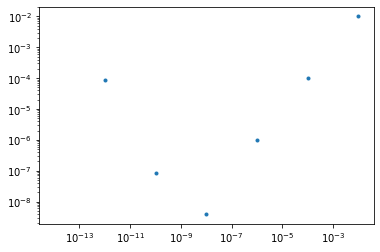

In [107]:
#implements the function f(x)=x(x−1)
def f(x):
    return x*(x-1)

#a
d=10**(-2)
def Df(x,d):
    return (f(x+d)-f(x))/d

def Df_analytic(x):
    return 2*x-1
print("the derivative of  f at the point 𝑥=1 using the derivative definition is:", Df(1,d))
print("the derivative of f at the point 𝑥=1 using the analytic definition is:", Df_analytic(1))


#b
d_list=[10**(-2),10**(-4),10**(-6),10**(-8),10**(-10),10**(-12),10**(-14)]
Df_list=[Df(1,d)-1 for d in d_list] #l'1 è perchè il Df_analitico=1
print(Df_list)

import matplotlib.pyplot as plt 
plt.plot(d_list,Df_list,'.')
plt.yscale("log")
plt.xscale("log")
plt.show()

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [126]:
#a
import math 
N=100
h=2/N
I=0 #sarà il risultato dell'integrale
for k in range(1,N+1):  #k=indice di slice
    x=-1+k*h  #posizione sull'asse x
    I+= math.sqrt(1-x**2)*h  #base per altezza..
print("the result of the integral with 100-slice is:", I)


#b
def integrate(N):
    h=2/N
    I=0 #sarà il risultato dell'integrale
    for k in range(1,N+1):  #k=indice di slice
        x=-1+k*(2/N)
        I+= math.sqrt(1-x**2)*h
    return I

import time
start=0
end=0
N=2000000
while end-start<1:
    start = time.time()
    integrate(N)
    end=time.time()
    N+=100000
print(N)


the result of the integral with 100-slice is: 1.5691342555492505
3200000


In [130]:
#VERIFICA
import math
import time

#a)
def rieman_int(N):
    h=2/N
    I=0
    for k in range(1,N+1,1):
        I += math.sqrt(1-pow(-1+k*h,2))*h
    return I

N=100
print(rieman_int(N))

#b)
end=0
start=0
N=2000000
while (end-start)<1:
    start= time.time()
    rieman_int(N)
    end= time.time()
    N+=100000
print(N)

1.5691342555492505
3000000
